<a href="https://colab.research.google.com/github/nandini-k15/Graphics-and-Visualization/blob/main/Topological_Spines_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing Beautifulsoup for reading XML file
from bs4 import BeautifulSoup

In [2]:
with open('/content/drive/MyDrive/parallel_ext_fuel_64x64x64_uint8_paths_simplified.vtp', 'r') as f:
    data = f.read()

In [3]:
bs_data = BeautifulSoup(data, 'xml')

In [4]:
print(bs_data)

<?xml version="1.0" encoding="utf-8"?>
<VTKFile byte_order="LittleEndian" header_type="UInt64" type="UnstructuredGrid" version="1.0">
<UnstructuredGrid>
<Piece NumberOfCells="624" NumberOfPoints="578">
<Points>
<DataArray Name="Points" NumberOfComponents="3" format="ascii" type="Int64">
51 32 26 53 32 21 52 31 20 51 31 19 50 31 19 50 32 19 50 32 20 49 32 21 49 32 22 50 32 23 50 32 24 51 32 24 51 32 25 56 32 25 54 32 22 55 32 22 55 32 23 55 32 24 56 32 24 50 23 23 50 28 23 50 27 22 49 26 21 49 25 20 49 26 20 50 25 21 50 24 21 50 24 22 50 23 22 51 23 22 51 23 23 50 28 24 51 28 24 51 29 24 51 30 24 51 31 24 54 24 24 53 23 23 52 23 22 51 22 22 55 24 24 56 24 24 56 25 24 56 26 24 56 27 24 56 28 24 56 29 25 57 29 25 57 30 25 56 30 25 56 31 25 50 26 24 50 25 23 49 24 22 49 24 21 50 27 24 51 27 24 56 27 25 57 27 25 57 27 26 57 26 26 57 28 26 57 29 26 57 30 26 54 39 24 55 39 24 55 38 24 56 38 24 56 38 25 56 37 25 57 37 26 57 35 26 56 34 25 55 33 24 50 40 23 53 39 23 52 39 22 51 39 22 50 39 22 5

In [5]:
b_name = bs_data.find_all('DataArray', {'Name':'Points'})

In [6]:
tst = str(b_name[0])

import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [7]:
op = cleanhtml(tst)
op = op.strip()
op = op.split(" ")
#op

In [8]:
len(op)/3

578.0

In [9]:
edges = bs_data.find_all('DataArray', {'Name':'connectivity'})

In [10]:
edges = str(edges[0])

In [11]:
edges = cleanhtml(edges)
edges = edges.strip()
edges = edges.split(" ")
#edges

In [12]:
l1 = []
count = 0
for item in edges:
    if item not in l1:
        count += 1
        l1.append(item)

In [13]:
for i in range(len(edges)):
  edges[i] = int(edges[i])

In [14]:
import networkx as nx

In [15]:
G=nx.Graph()

In [23]:
length = len(edges)
for i in range(0,1248,2):
  #print(edges[i] , edges[i+1])
  G.add_edge(edges[i],edges[i+1])



In [18]:
G.edges

EdgeView([(1, 2), (1, 14), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (10, 101), (11, 12), (11, 35), (12, 0), (12, 91), (0, 115), (0, 167), (0, 181), (0, 210), (14, 15), (15, 16), (16, 17), (16, 73), (17, 18), (18, 13), (13, 50), (13, 93), (20, 21), (20, 31), (21, 22), (22, 23), (23, 24), (23, 25), (25, 26), (26, 27), (26, 54), (27, 28), (28, 29), (29, 30), (29, 39), (30, 19), (30, 107), (19, 84), (31, 32), (32, 33), (32, 56), (33, 34), (34, 35), (36, 37), (36, 40), (37, 38), (38, 39), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (44, 57), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (49, 63), (51, 52), (51, 55), (52, 53), (53, 54), (55, 56), (57, 58), (58, 59), (59, 60), (60, 61), (60, 125), (60, 160), (61, 62), (62, 63), (64, 65), (64, 75), (65, 66), (66, 67), (66, 119), (67, 68), (68, 69), (69, 70), (69, 98), (70, 71), (70, 174), (71, 72), (72, 73), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 74), (82, 83), (82, 85), (83

In [19]:
pos = nx.spring_layout(G , k =1 , dim =2 , scale = 100 )

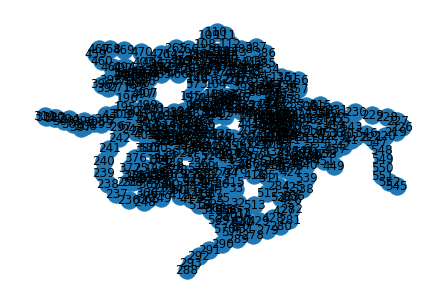

In [20]:
nx.draw(G, with_labels= True)

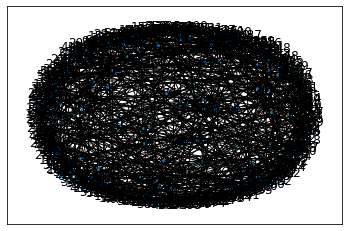

<Figure size 2000x1000 with 0 Axes>

In [26]:
nx.draw_networkx_nodes(G, pos, node_size=3)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.figure(figsize=(200, 100), dpi=10)
plt.show() 